# K-nearest neighbors regression
## Yoav Ram

In this exercise we will find the best K for K-nearest neighbors estimator.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.simplefilter('ignore', FutureWarning)
warnings.simplefilter('ignore', UserWarning)

import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import scale

# if import fails, install from terminal with:
# python -m pip install yellowbrick
from yellowbrick.model_selection import validation_curve
from yellowbrick.regressor import prediction_error, cooks_distance

import seaborn as sns
red, blue, green = sns.color_palette('Set1', 3)
sns.set(
    style='ticks',
    context='talk',
    palette='Set1'
)

In [2]:
import sklearn
print("Scikit-learn version:", sklearn.__version__)
import yellowbrick
print("Yellowbrick version:", yellowbrick.__version__)

Scikit-learn version: 1.0.1
Yellowbrick version: 1.3.post1


Let's start by loading the dataset.

In [3]:
df = pd.read_csv('../data/seeds_dataset.txt', sep='\t')
df.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry,kernel_groove,cultivar
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


We are going to predict the `area` of the seed from the other features.

In [4]:
target_name = 'area'
feature_names = list(df.columns)
feature_names.remove(target_name)

X = df[feature_names].values
X = scale(X)
y = df[target_name].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

**Use a `validation_curve`** to choose the value of the classifier parameter `n_neighbors` that maximizes the estimator score.

Refereces:
- Scikit-learn's [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)
- Yellowbrick's [validation_curve](https://www.scikit-yb.org/en/latest/api/model_selection/validation_curve.html)

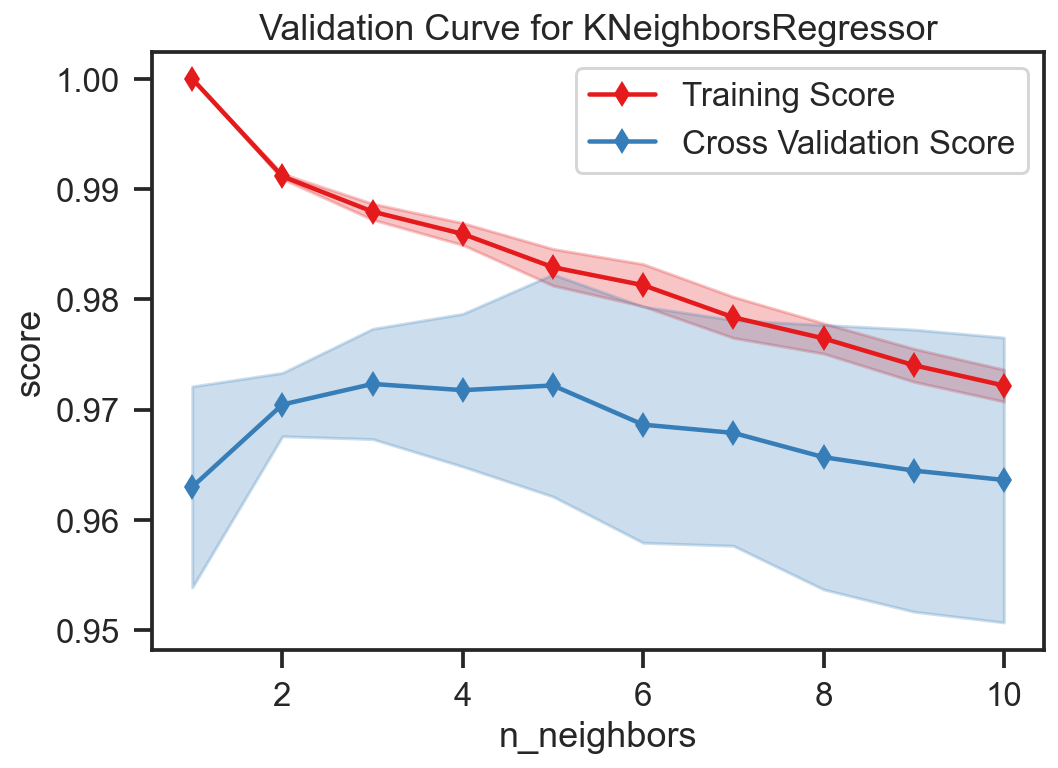

In [11]:
val_curve = validation_curve(KNeighborsRegressor(), X_train, y_train, 'n_neighbors', range(1, 11))

**Fit the best model and print its score**.

In [13]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
print('R2 = {:.3f}'.format(knn.score(X_test, y_test)))

R2 = 0.981


**Use a [`prediction_error`](https://www.scikit-yb.org/en/latest/api/regressor/peplot.html) plot** to evaluate the performance of the best K-neighbors regressor.

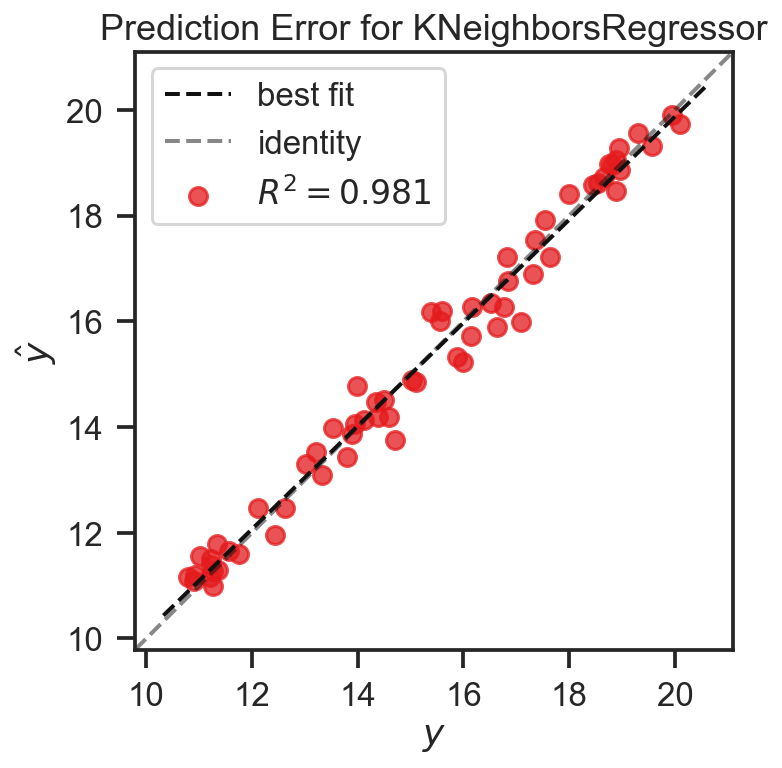

In [14]:
pred_err = prediction_error(knn, X_train, y_train, X_test, y_test)